# Scraping Team Seas Data for analysis

In [1]:
import requests
import pandas
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import locale

In [2]:
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
headers = {"User-Agent": "Mozilla/5.0"}
# r = requests.get("https://teamseas.org/all-donors/", headers=headers)
r = requests.get("https://tscache.com/lb_recent.json")
# soup = BeautifulSoup(r.content, "html.parser")
donations = r.json()

In [3]:
donations.keys()

dict_keys(['recent', 'teams', 'most', 'config', 'teams_alpha', 'teams_most_donations'])

In [4]:
len(donations["recent"])

120

In [5]:
df_li = []
for recents in donations["recent"]:
    d = {}
    d["name"] = recents["name"]
    if recents["team_name"]:
        d["team_name"] = recents["team_name"]
    else:
        d["team_name"] = "Anonymous"
    d["created"] = datetime.strptime(datetime.utcfromtimestamp(int(recents["created_at"])).strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')
    d["amount"] = locale.atoi(recents["pounds"])
    df_li.append(d)
df_li

[{'name': 'Kormit',
  'team_name': 'Relaxing White Noise',
  'created': datetime.datetime(2021, 12, 7, 14, 16, 29),
  'amount': 5},
 {'name': 'Anonymous',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 7, 14, 15, 57),
  'amount': 20},
 {'name': 'Volker',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 7, 14, 13, 6),
  'amount': 5},
 {'name': 'Naomi',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 7, 14, 11, 32),
  'amount': 5},
 {'name': 'RandomGamerAnyway',
  'team_name': 'Team Cheema',
  'created': datetime.datetime(2021, 12, 7, 14, 9, 55),
  'amount': 5},
 {'name': 'RandomGamerAnyway',
  'team_name': 'Team Cheema',
  'created': datetime.datetime(2021, 12, 7, 14, 6, 50),
  'amount': 2},
 {'name': 'Kevin',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 7, 14, 5, 3),
  'amount': 20},
 {'name': 'MrSampson',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 7, 14, 1, 57),
  'amount':

In [6]:
df = pandas.DataFrame(df_li)
df["created"][0].strftime("%Y-%m-%d %H:%M:%S")

'2021-12-07 14:16:29'

## Plot of Donations vs Time

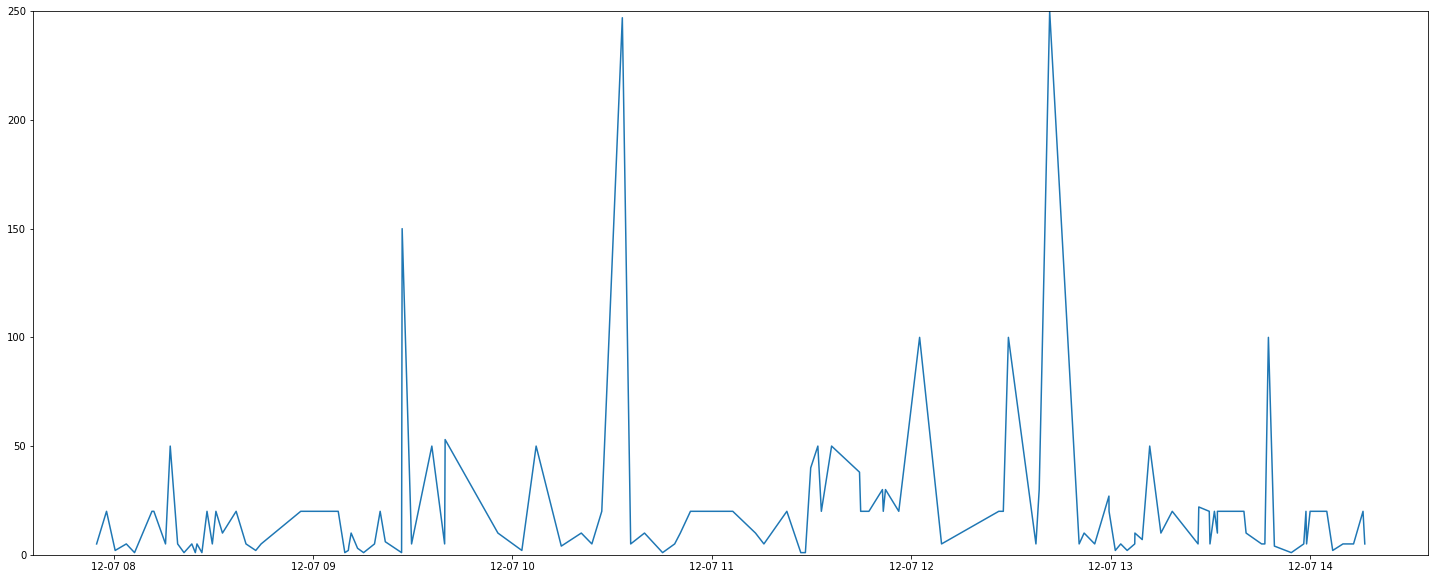

In [7]:
plt.figure(figsize=(25, 10))
# plt.yticks(range(min(df["amount"]), max(df["amount"])))
plt.ylim(0, df["amount"].max())
plt.plot(df["created"], df["amount"])

## Grouping according to teams

In [8]:
grouped_data = df.groupby(df["team_name"])["amount"].sum()
grouped_data

team_name
#TeamRamstein               50
:)                         100
Anonymous                 1729
Duck Lab                   247
Empress                     10
Ethan                        5
Hightowa Army                5
Mr.Felipe                    1
MrBallen                     1
MrBeast                    105
Rajr                         5
Relaxing White Noise         5
René Niemann                 5
SASQ                        10
StyL                         5
Swingy                       5
Team Cheema                  7
Team Estep                 100
Team Manatee                22
TeamMrBallen                 1
TeamMrBeast                 20
Trash Sexual Harrasers       2
Videofactory                20
We the people               20
budda dawg                  10
Name: amount, dtype: int64

In [9]:
teams_df = pandas.DataFrame({"team_name": grouped_data.index, "total_donated": grouped_data.values})
teams_df

,team_name,total_donated
0,#TeamRamstein,50
1,:),100
2,Anonymous,1729
3,Duck Lab,247
4,Empress,10
5,Ethan,5
6,Hightowa Army,5
7,Mr.Felipe,1
8,MrBallen,1
9,MrBeast,105


In [10]:
teams_df.sort_values(by=["total_donated"], ascending=False, inplace=True)

([<matplotlib.patches.Wedge at 0x22d240d41f0>,
 [Text(-0.6307445094824153, 0.9011999576996148, 'Anonymous'),
  Text(-0.041625828670836244, -1.0992121225620952, 'Duck Lab'),
  Text(0.43469617115621056, -1.010464862715241, 'MrBeast'),
  Text(0.6786846723139471, -0.8656714824724854, ':)'),
  Text(0.8733217901476872, -0.6688116706915627, 'Team Estep'),
  Text(0.9835488341515076, -0.49257658373009394, '#TeamRamstein'),
  Text(1.0241781852068796, -0.40132162282431644, 'Team Manatee'),
  Text(1.0439969374701479, -0.3465117524023573, 'We the people'),
  Text(1.0601478213533067, -0.2934051752778702, 'Videofactory'),
  Text(1.0735991311700925, -0.2395514674361708, 'TeamMrBeast'),
  Text(1.0818951519606204, -0.19875331485061176, 'SASQ'),
  Text(1.0865654724989913, -0.17139274772592866, 'budda dawg'),
  Text(1.0905439718375596, -0.14392305405584038, 'Empress'),
  Text(1.093379847411783, -0.12050107582003627, 'Team Cheema'),
  Text(1.095078875672197, -0.10393390234431271, 'Relaxing White Noise'),
 

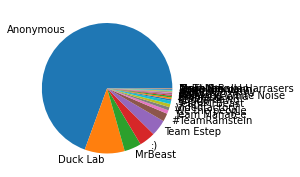

In [11]:
plt.figure(figsize=(25, 3))
plt.pie(teams_df["total_donated"], labels=teams_df["team_name"])

## Hourly Average

In [12]:
df["hour"] = df["created"].dt.strftime("%H")
df

,name,team_name,created,amount,hour
0,Kormit,Relaxing White Noise,2021-12-07 14:16:29,5,14
1,Anonymous,Anonymous,2021-12-07 14:15:57,20,14
2,Volker,Anonymous,2021-12-07 14:13:06,5,14
3,Naomi,Anonymous,2021-12-07 14:11:32,5,14
4,RandomGamerAnyway,Team Cheema,2021-12-07 14:09:55,5,14
...,...,...,...,...,...
115,Anonymous,Anonymous,2021-12-07 08:06:19,1,08
116,Mariia,Anonymous,2021-12-07 08:03:50,5,08
117,Keraso,Anonymous,2021-12-07 08:00:29,2,08
118,Anonymous,Anonymous,2021-12-07 07:57:53,20,07


In [13]:
hourly_grp = df.groupby(df["hour"])["amount"].sum()
hourly_grp

hour
07     25
08    228
09    346
10    389
11    395
12    597
13    388
14    122
Name: amount, dtype: int64

In [14]:
hourly_df = pandas.DataFrame({"hour": hourly_grp.index, "total_donation": hourly_grp.values })
hourly_df

,hour,total_donation
0,07,25
1,08,228
2,09,346
3,10,389
4,11,395
5,12,597
6,13,388
7,14,122


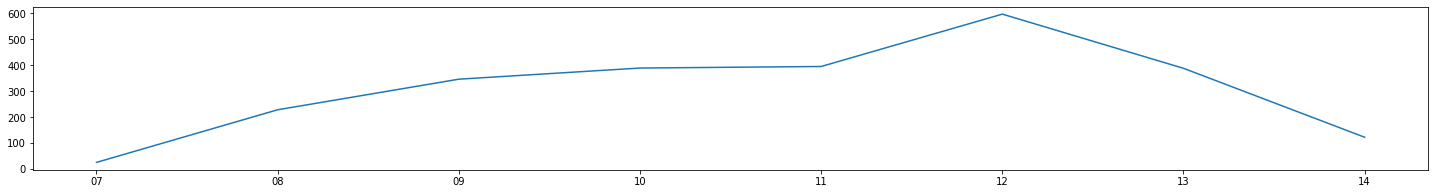

In [15]:
plt.figure(figsize=(25, 3))
plt.plot(hourly_df["hour"], hourly_df["total_donation"])

## Minute Average 

In [16]:
df["minute"] = df["created"].dt.strftime("%H-%M")
df

,name,team_name,created,amount,hour,minute
0,Kormit,Relaxing White Noise,2021-12-07 14:16:29,5,14,14-16
1,Anonymous,Anonymous,2021-12-07 14:15:57,20,14,14-15
2,Volker,Anonymous,2021-12-07 14:13:06,5,14,14-13
3,Naomi,Anonymous,2021-12-07 14:11:32,5,14,14-11
4,RandomGamerAnyway,Team Cheema,2021-12-07 14:09:55,5,14,14-09
...,...,...,...,...,...,...
115,Anonymous,Anonymous,2021-12-07 08:06:19,1,08,08-06
116,Mariia,Anonymous,2021-12-07 08:03:50,5,08,08-03
117,Keraso,Anonymous,2021-12-07 08:00:29,2,08,08-00
118,Anonymous,Anonymous,2021-12-07 07:57:53,20,07,07-57


In [17]:
minute_grp = df.groupby(df["minute"])["amount"].sum()
minute_grp

minute
07-54     5
07-57    20
08-00     2
08-03     5
08-06     1
         ..
14-09     5
14-11     5
14-13     5
14-15    20
14-16     5
Name: amount, Length: 106, dtype: int64

In [18]:
minute_df = pandas.DataFrame({"minute": minute_grp.index, "total_donation": minute_grp.values})
minute_df

,minute,total_donation
0,07-54,5
1,07-57,20
2,08-00,2
3,08-03,5
4,08-06,1
...,...,...
101,14-09,5
102,14-11,5
103,14-13,5
104,14-15,20


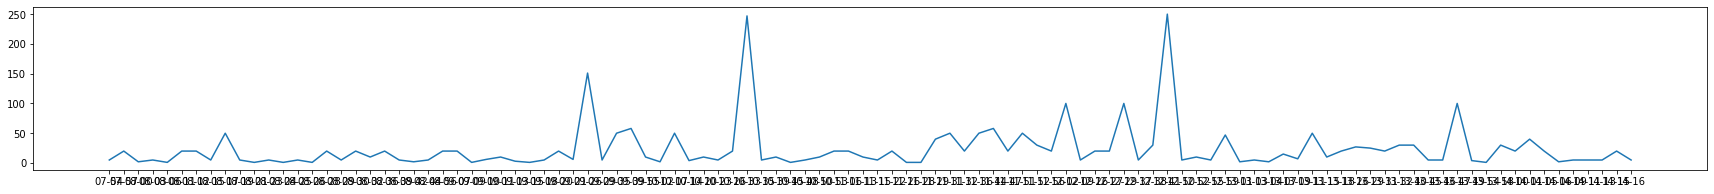

In [19]:
plt.figure(figsize=(30, 3))
plt.plot(minute_df["minute"], minute_df["total_donation"])

## Most Donations Analysis

In [20]:
donations["most"]

[{'ff': 0,
  'name': 'Tobi Lütke',
  'team_name': '',
  'message_public': 'For the Lorax... but wet.',
  'flair': 'feed-icon-6.png',
  'pounds': '1,200,001',
  'pounds_color': 'FFB72B',
  'created_at': 1635781768,
  'is_gift': 0},
 {'ff': 0,
  'name': 'ERIK BERGMAN, GREAT.COM',
  'team_name': 'GREAT.COM',
  'message_public': 'THE UNCONVENTIONAL CHARITY PROJECT GREAT.COM AND @SMILINGERIK ARE MOVING MONEY FROM THE ONLINE CASINO INDUSTRY TO CLEAN UP 500+ TONNES OF TRASH.',
  'flair': 'feed-icon-6.png',
  'pounds': '1,200,000',
  'pounds_color': 'FFB72B',
  'created_at': 1635710296,
  'is_gift': 0},
 {'ff': 0,
  'name': 'Anonymous',
  'team_name': '',
  'message_public': 'BIG OR SMALL, WE CAN ALL MAKE A DIFFERENCE. #TEAMSEAS',
  'flair': 'feed-icon-6.png',
  'pounds': '1,000,000',
  'pounds_color': 'FFB72B',
  'created_at': 1636748929,
  'is_gift': 0},
 {'ff': 0,
  'name': 'The Bikoff Foundation',
  'team_name': '',
  'message_public': '',
  'flair': 'feed-icon-6.png',
  'pounds': '1,000,0

In [21]:
df_li = []
for mst in donations["most"]:
    d = {}
    d["name"] = mst["name"]
    d["amount"] = locale.atoi(mst["pounds"])
    d["created"] = datetime.strptime(datetime.utcfromtimestamp(int(mst["created_at"])).strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')
    df_li.append(d)
df_li

[{'name': 'Tobi Lütke',
  'amount': 1200001,
  'created': datetime.datetime(2021, 11, 1, 15, 49, 28)},
 {'name': 'ERIK BERGMAN, GREAT.COM',
  'amount': 1200000,
  'created': datetime.datetime(2021, 10, 31, 19, 58, 16)},
 {'name': 'Anonymous',
  'amount': 1000000,
  'created': datetime.datetime(2021, 11, 12, 20, 28, 49)},
 {'name': 'The Bikoff Foundation',
  'amount': 1000000,
  'created': datetime.datetime(2021, 10, 31, 2, 7, 33)},
 {'name': 'Patreon',
  'amount': 500000,
  'created': datetime.datetime(2021, 11, 3, 1, 44, 23)},
 {'name': 'YouTube Originals',
  'amount': 400000,
  'created': datetime.datetime(2021, 10, 30, 2, 11, 52)},
 {'name': 'Susan Wojcicki',
  'amount': 350000,
  'created': datetime.datetime(2021, 11, 6, 18, 33, 29)},
 {'name': 'Sealow',
  'amount': 350000,
  'created': datetime.datetime(2021, 10, 30, 1, 22, 49)},
 {'name': 'Rapture',
  'amount': 231363,
  'created': datetime.datetime(2021, 11, 3, 1, 27, 11)},
 {'name': 'Dyar Al-Ashtari',
  'amount': 150000,
  'cre

In [22]:
df = pandas.DataFrame(df_li)
df

,name,amount,created
0,Tobi Lütke,1200001,2021-11-01 15:49:28
1,"ERIK BERGMAN, GREAT.COM",1200000,2021-10-31 19:58:16
2,Anonymous,1000000,2021-11-12 20:28:49
3,The Bikoff Foundation,1000000,2021-10-31 02:07:33
4,Patreon,500000,2021-11-03 01:44:23
...,...,...,...
115,Jordan Matter,5000,2021-10-30 01:26:26
116,Tyler Pappas,5000,2021-10-29 21:12:02
117,Elayadi,5000,2021-10-29 20:50:30
118,Spencer Jan,5000,2021-10-29 20:40:16


<BarContainer object of 120 artists>

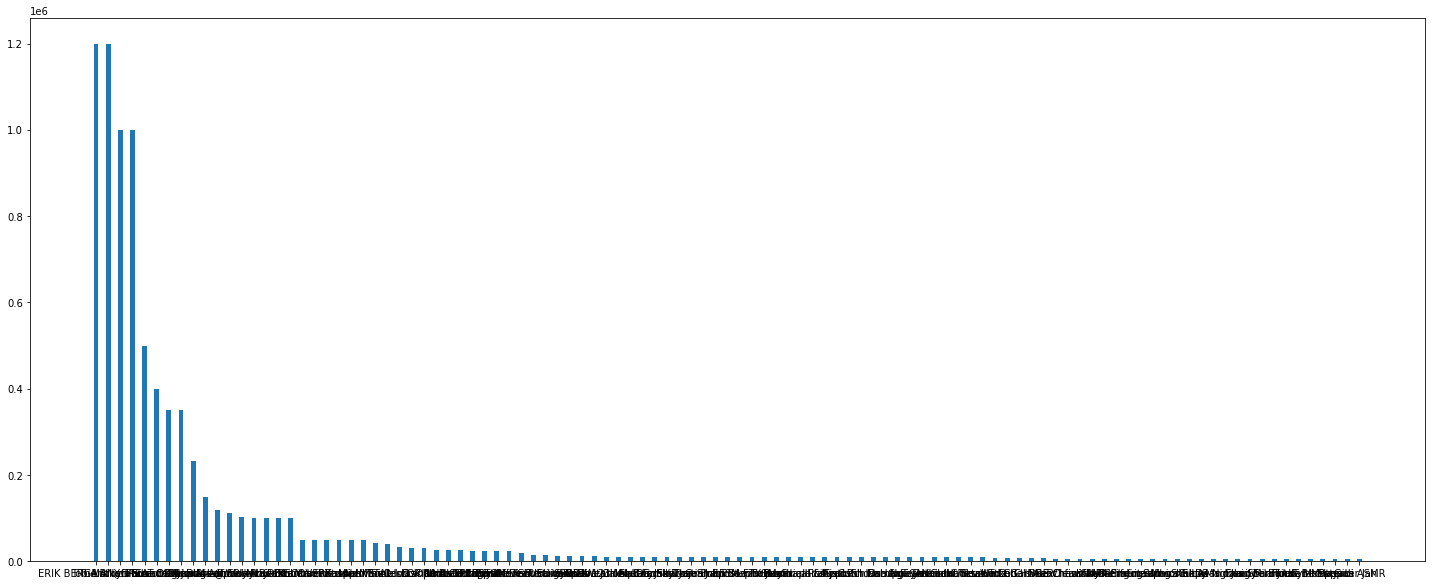

In [23]:
plt.figure(figsize=(25, 10))
plt.bar(df["name"], df["amount"], width=0.4)

## Sorting on basis of Date

In [24]:
date_sorted = df.sort_values(by=["created"])
date_sorted

,name,amount,created
15,Mark Rober,100010,2021-10-29 19:54:59
14,MrBeast,100011,2021-10-29 19:55:00
47,Doctor Mike,11111,2021-10-29 20:02:15
79,GothamChess,10000,2021-10-29 20:06:17
46,Guava Juice,12345,2021-10-29 20:06:33
...,...,...,...
98,SamsonF,5000,2021-12-05 14:38:53
56,Bonnie Foster,10000,2021-12-05 23:34:56
55,Anonymous,10000,2021-12-06 05:07:15
41,Bonnie Foster,15000,2021-12-06 14:49:55


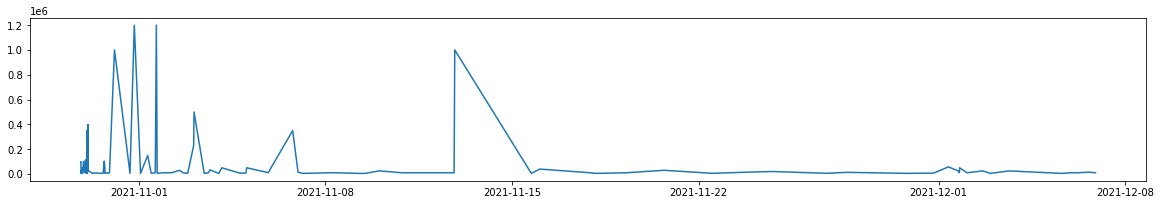

In [25]:
plt.figure(figsize=(20,3))
plt.plot(date_sorted["created"], date_sorted["amount"])

## Team most donations

In [26]:
donations["teams_most_donations"]

[{'team': '',
  'total_donation': '11,309,686',
  'total_members': '190112',
  'sort_donation': '11309686'},
 {'team': 'YT_Total',
  'total_donation': '1,252,069',
  'total_members': '4',
  'sort_donation': '1252069'},
 {'team': 'GREAT.COM',
  'total_donation': '1,200,061',
  'total_members': '11',
  'sort_donation': '1200061'},
 {'team': 'MrBeast',
  'total_donation': '582,255',
  'total_members': '1029',
  'sort_donation': '582255'},
 {'team': 'Creators',
  'total_donation': '500,081',
  'total_members': '9',
  'sort_donation': '500081'},
 {'team': '8ec52114',
  'total_donation': '231,363',
  'total_members': '1',
  'sort_donation': '231363'},
 {'team': 'Pear AS',
  'total_donation': '150,000',
  'total_members': '1',
  'sort_donation': '150000'},
 {'team': "Mark Rober's Team",
  'total_donation': '132,948',
  'total_members': '921',
  'sort_donation': '132948'},
 {'team': 'DOGS OF ELON (NFT)',
  'total_donation': '124,257',
  'total_members': '5',
  'sort_donation': '124257'},
 {'te

In [49]:
df_li = []
for i in donations["teams_most_donations"]:
    d = {}
    if not i["team"]:
        d["team_name"] = "Anonymous"
    else:
        d["team_name"] = i["team"]
    d["donation"] = locale.atoi(i["total_donation"])
    d["members"] = int(i["total_members"])
    df_li.append(d)
df_li

[{'team_name': 'Anonymous', 'donation': 11309686, 'members': 190112},
 {'team_name': 'YT_Total', 'donation': 1252069, 'members': 4},
 {'team_name': 'GREAT.COM', 'donation': 1200061, 'members': 11},
 {'team_name': 'MrBeast', 'donation': 582255, 'members': 1029},
 {'team_name': 'Creators', 'donation': 500081, 'members': 9},
 {'team_name': '8ec52114', 'donation': 231363, 'members': 1},
 {'team_name': 'Pear AS', 'donation': 150000, 'members': 1},
 {'team_name': "Mark Rober's Team", 'donation': 132948, 'members': 921},
 {'team_name': 'DOGS OF ELON (NFT)', 'donation': 124257, 'members': 5},
 {'team_name': 'Prianna', 'donation': 100242, 'members': 14},
 {'team_name': 'Royal Caribbean', 'donation': 100175, 'members': 7},
 {'team_name': 'BIG Games', 'donation': 75161, 'members': 10},
 {'team_name': '#markrober', 'donation': 70554, 'members': 2356},
 {'team_name': 'CATFACE', 'donation': 50406, 'members': 13},
 {'team_name': '@SharkWeek', 'donation': 50150, 'members': 1},
 {'team_name': 'OGUsers'

In [50]:
df = pandas.DataFrame(df_li)
df

,team_name,donation,members
0,Anonymous,11309686,190112
1,YT_Total,1252069,4
2,GREAT.COM,1200061,11
3,MrBeast,582255,1029
4,Creators,500081,9
5,8ec52114,231363,1
6,Pear AS,150000,1
7,Mark Rober's Team,132948,921
8,DOGS OF ELON (NFT),124257,5
9,Prianna,100242,14


## Average Donation per member
To get accurate doantion numbers by each team

In [51]:
df["avg"] = df["donation"]/df["members"]
df

,team_name,donation,members,avg
0,Anonymous,11309686,190112,59.489596
1,YT_Total,1252069,4,313017.250000
2,GREAT.COM,1200061,11,109096.454545
3,MrBeast,582255,1029,565.845481
4,Creators,500081,9,55564.555556
5,8ec52114,231363,1,231363.000000
6,Pear AS,150000,1,150000.000000
7,Mark Rober's Team,132948,921,144.351792
8,DOGS OF ELON (NFT),124257,5,24851.400000
9,Prianna,100242,14,7160.142857


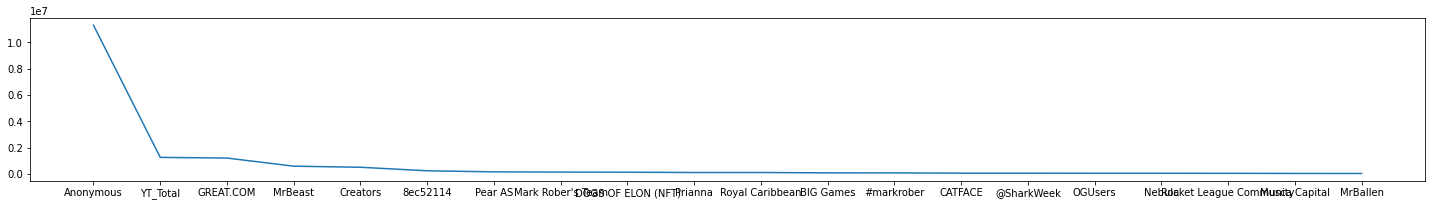

In [52]:
plt.figure(figsize=(25, 3))
plt.plot(df["team_name"], df["donation"])

In [53]:
df.sort_values(by=["avg"], ascending=False)

,team_name,donation,members,avg
1,YT_Total,1252069,4,313017.250000
5,8ec52114,231363,1,231363.000000
6,Pear AS,150000,1,150000.000000
2,GREAT.COM,1200061,11,109096.454545
4,Creators,500081,9,55564.555556
14,@SharkWeek,50150,1,50150.000000
18,Musca Capital,30069,1,30069.000000
8,DOGS OF ELON (NFT),124257,5,24851.400000
10,Royal Caribbean,100175,7,14310.714286
17,Rocket League Community,40011,4,10002.750000


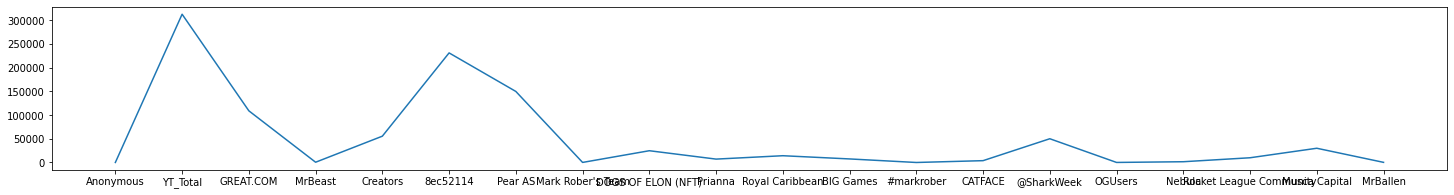

In [54]:
plt.figure(figsize=(25, 3))
plt.plot(df["team_name"], df["avg"])